<a href="https://colab.research.google.com/github/ZenoZoldyck/hand_on_tensorflow/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

tf.__version__

'2.5.0'

In [41]:
# We will use the fashion mnist dataset which is inbuilt in keras

from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [42]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [43]:
train_label[0]

9

In [44]:
len(train_data), len(test_data)

(60000, 10000)

In [45]:
# check shape
train_data.shape, train_label.shape

((60000, 28, 28), (60000,))

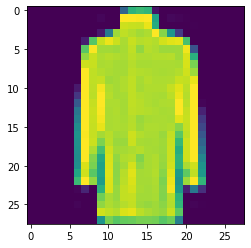

In [46]:
import matplotlib.pyplot as plt
plt.imshow(train_data[75])

Text(0.5, 1.0, 'ankel boot')

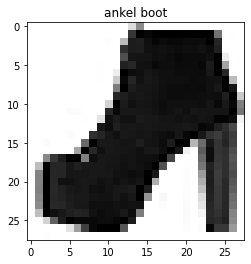

In [47]:
# lets name the classes
class_name = ["tshirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankel boot"]

plt.imshow(train_data[44], cmap = plt.cm.binary)
plt.title(class_name[train_label[44]])

In [48]:
# time for some model building

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),                         
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "sigmoid"),
    tf.keras.layers.Dense(10, activation = "softmax")                         
])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["accuracy"])

history = model.fit(train_data, train_label, epochs = 50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7452 - accuracy: 0.2568
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7504 - accuracy: 0.2465
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6857 - accuracy: 0.2350
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5951 - accuracy: 0.2930
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5628 - accuracy: 0.3018
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5117 - accuracy: 0.3248
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5682 - accuracy: 0.3167
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5469 - accuracy: 0.3385
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4715 - accuracy: 0.3354
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.718

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [50]:
# normalization is needed

train_data = train_data / train_data.max()
test_data = test_data / test_data.max()

# one hot encoding the labels

train_label = tf.one_hot(train_label, depth = 10)
test_label = tf.one_hot(test_label, depth = 10)
train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [51]:
train_label[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [52]:
# once again model creation

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")                           
])

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history_2 = model_2.fit(train_data, train_label, epochs = 50,
                        validation_data = (test_data, test_label))


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5530 - accuracy: 0.8063 - val_loss: 0.4603 - val_accuracy: 0.8335
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4049 - accuracy: 0.8558 - val_loss: 0.4262 - val_accuracy: 0.8500
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8666 - val_loss: 0.3842 - val_accuracy: 0.8591
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3495 - accuracy: 0.8736 - val_loss: 0.3779 - val_accuracy: 0.8659
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3338 - accuracy: 0.8787 - val_loss: 0.3759 - val_accuracy: 0.8619
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.8816 - val_loss: 0.3991 - val_accuracy: 0.8574
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8857 - val_loss: 0.3653 - val_accuracy:

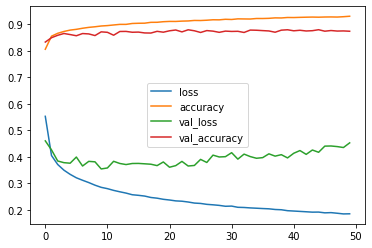

In [53]:
pd.DataFrame(history_2.history).plot()

In [54]:
y_prob = model_2.predict(test_data)
y_prob[0]

array([1.2914076e-18, 1.5476827e-19, 6.5348844e-18, 4.3566314e-16,
       3.0041648e-22, 4.0661430e-09, 2.7505640e-14, 1.2152635e-03,
       5.0391695e-16, 9.9878472e-01], dtype=float32)

In [55]:
y_preds = y_prob.argmax(axis = 1)
y_preds[:5]

array([9, 2, 1, 1, 0])

In [56]:
test_label[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [57]:
test_labels = test_label.numpy().argmax(axis = 1)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[831,   3,  28,  53,   2,   2,  74,   0,   7,   0],
       [  3, 965,   3,  23,   3,   0,   2,   0,   1,   0],
       [ 15,   1, 852,  18,  68,   2,  43,   0,   1,   0],
       [ 18,   5,  16, 916,  20,   2,  20,   0,   3,   0],
       [  0,   1, 139,  43, 740,   0,  73,   0,   4,   0],
       [  0,   0,   0,   0,   0, 943,   0,  28,   2,  27],
       [144,   1, 125,  54,  46,   1, 621,   1,   7,   0],
       [  0,   0,   0,   0,   0,  15,   0, 953,   0,  32],
       [  3,   0,  10,  11,   1,   6,   5,   3, 961,   0],
       [  0,   0,   0,   0,   0,   7,   1,  30,   0, 962]])

In [59]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
